# T1.3. Data Cleaning - Visualizacion

In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
mainpath = '../data'
data = pd.read_csv(os.path.join(mainpath, 'customer-churn-model/Customer Churn Model.txt'))

In [36]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [37]:
data.shape

(3333, 21)

Cuando hacemos plots, hay que recordar dos cosas:
1. uso de %matplotlib inline --> Para genera run gráfico en linea
2. uso de savefig como funcion para guarar la figura en un path correspondiente.

In [38]:
%matplotlib inline

# Scatter Plot

<AxesSubplot: xlabel='Day Mins', ylabel='Day Charge'>

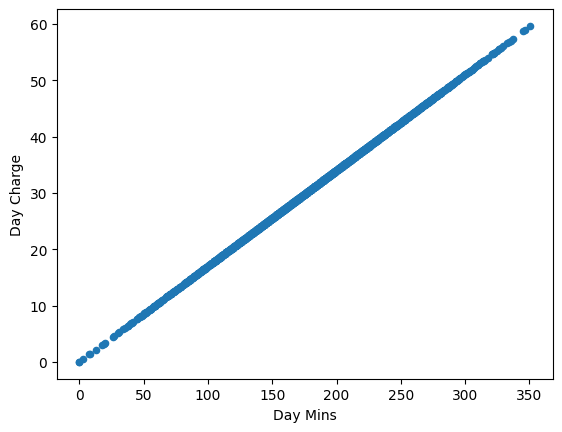

In [39]:
data.plot(kind='scatter', x="Day Mins", y ="Day Charge")

<AxesSubplot: xlabel='Night Mins', ylabel='Night Charge'>

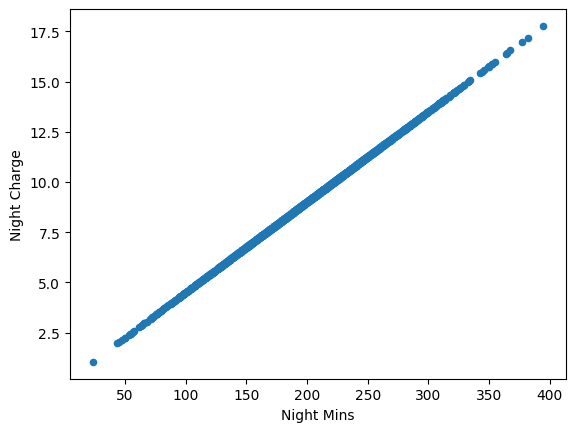

In [40]:
data.plot(kind='scatter', x="Night Mins", y ="Night Charge")

<AxesSubplot: xlabel='Night Calls', ylabel='Night Charge'>

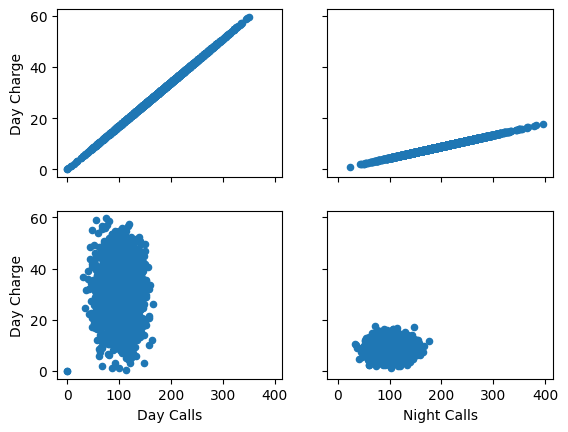

In [41]:
figure, axis = plt.subplots(2,2, sharex=True, sharey=True)
data.plot(kind='scatter', x="Day Mins", y ="Day Charge", ax= axis[0][0])
data.plot(kind='scatter', x="Night Mins", y ="Night Charge", ax= axis[0][1])
data.plot(kind='scatter', x="Day Calls", y ="Day Charge", ax= axis[1][0])
data.plot(kind='scatter', x="Night Calls", y ="Night Charge", ax= axis[1][1])

## Histogramas de frecuencias

Text(0.5, 1.0, 'Histograma de numero de llamadas al día')

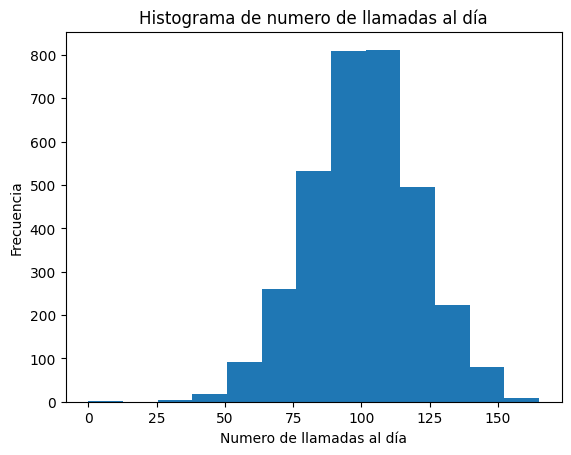

In [46]:
plt.hist(data['Day Calls'], bins= int(np.ceil(1+np.log2(data.shape[0])))) #Aplicación de la regla de sturges
plt.xlabel("Numero de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma de numero de llamadas al día")

## Box Plots: Diagrama de Cajas y Bigotes

Text(0.5, 1.0, 'LLamadas diarias')

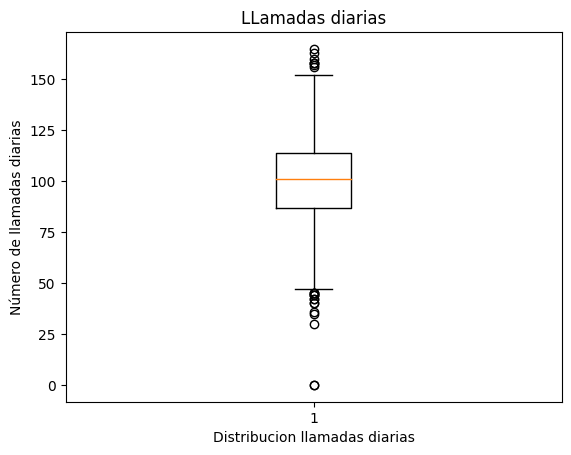

In [49]:
plt.boxplot(data['Day Calls'])
plt.ylabel("Número de llamadas diarias")
plt.xlabel("Distribucion llamadas diarias")
plt.title("LLamadas diarias")

In [50]:
data['Day Calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [51]:
IQR = data['Day Calls'].quantile(0.75) - data['Day Calls'].quantile(0.25)
IQR

27.0

In [52]:
data['Day Calls'].quantile(0.25)-1.5*IQR

46.5

In [53]:
data['Day Calls'].quantile(0.75)+ 1.5*IQR

154.5